# The Riemann Zeta Function: Visualization and Analysis

## 1. Introduction

The **Riemann zeta function** $\zeta(s)$ is one of the most important functions in mathematics, with deep connections to number theory, complex analysis, and physics. It was first introduced by Leonhard Euler in the 18th century for real arguments, and later extended to complex numbers by Bernhard Riemann in his groundbreaking 1859 paper.

## 2. Definition

For complex numbers $s$ with $\text{Re}(s) > 1$, the zeta function is defined by the **Dirichlet series**:

$$\zeta(s) = \sum_{n=1}^{\infty} \frac{1}{n^s} = \frac{1}{1^s} + \frac{1}{2^s} + \frac{1}{3^s} + \cdots$$

### 2.1 Euler Product Formula

Euler discovered the remarkable connection between the zeta function and prime numbers:

$$\zeta(s) = \prod_{p \text{ prime}} \frac{1}{1 - p^{-s}}$$

This formula demonstrates that the distribution of prime numbers is encoded in $\zeta(s)$.

### 2.2 Analytic Continuation

The zeta function can be analytically continued to the entire complex plane (except for a simple pole at $s = 1$) using the **functional equation**:

$$\zeta(s) = 2^s \pi^{s-1} \sin\left(\frac{\pi s}{2}\right) \Gamma(1-s) \zeta(1-s)$$

where $\Gamma(s)$ is the gamma function.

## 3. The Critical Strip and Riemann Hypothesis

The **critical strip** is the region $0 < \text{Re}(s) < 1$. The **critical line** is where $\text{Re}(s) = \frac{1}{2}$.

The **Riemann Hypothesis** (one of the Millennium Prize Problems) conjectures that all non-trivial zeros of $\zeta(s)$ lie on the critical line:

$$\zeta\left(\frac{1}{2} + it\right) = 0 \quad \text{for some } t \in \mathbb{R}$$

## 4. Special Values

Several special values of the zeta function are known:

- $\zeta(2) = \frac{\pi^2}{6}$ (Basel problem)
- $\zeta(4) = \frac{\pi^4}{90}$
- $\zeta(-1) = -\frac{1}{12}$ (via analytic continuation)
- $\zeta(0) = -\frac{1}{2}$

## 5. Computational Implementation

We will now implement and visualize the Riemann zeta function using Python. We'll use `scipy.special.zeta` for real arguments and implement our own computation for complex arguments using the Dirichlet series and reflection formula.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, zeta as real_zeta
from matplotlib.colors import hsv_to_rgb
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")

Libraries imported successfully


### 5.1 Implementing the Complex Zeta Function

We implement the zeta function using:
1. Direct summation for $\text{Re}(s) > 1$
2. The reflection formula for $\text{Re}(s) \leq 0$
3. Alternating series (Dirichlet eta function) for the critical strip

In [2]:
def complex_zeta(s, num_terms=1000):
    """
    Compute the Riemann zeta function for complex s.
    
    Uses different methods depending on the region:
    - Direct summation for Re(s) > 1
    - Dirichlet eta function for 0 < Re(s) <= 1
    - Reflection formula for Re(s) <= 0
    
    Parameters:
    -----------
    s : complex
        The argument of the zeta function
    num_terms : int
        Number of terms in the series approximation
    
    Returns:
    --------
    complex : The value of zeta(s)
    """
    s = complex(s)
    
    # Handle the pole at s = 1
    if abs(s - 1) < 1e-10:
        return complex(np.inf)
    
    # For Re(s) > 1, use direct summation with acceleration
    if s.real > 1:
        result = sum(1.0 / n**s for n in range(1, num_terms + 1))
        return result
    
    # For 0 < Re(s) <= 1, use the Dirichlet eta function
    # eta(s) = (1 - 2^(1-s)) * zeta(s)
    if s.real > 0:
        # Compute eta using alternating series (converges for Re(s) > 0)
        eta = sum((-1)**(n+1) / n**s for n in range(1, num_terms + 1))
        factor = 1 - 2**(1 - s)
        if abs(factor) < 1e-10:
            return complex(np.log(2))  # Special case at s approaching 1
        return eta / factor
    
    # For Re(s) <= 0, use the reflection formula
    # zeta(s) = 2^s * pi^(s-1) * sin(pi*s/2) * gamma(1-s) * zeta(1-s)
    zeta_1_minus_s = complex_zeta(1 - s, num_terms)
    result = (2**s * np.pi**(s-1) * 
              np.sin(np.pi * s / 2) * 
              gamma(1 - s) * 
              zeta_1_minus_s)
    return result

# Test the implementation with known values
print("Testing zeta function implementation:")
print(f"ζ(2) = {complex_zeta(2):.6f} (expected: {np.pi**2/6:.6f})")
print(f"ζ(4) = {complex_zeta(4):.6f} (expected: {np.pi**4/90:.6f})")
print(f"ζ(-1) = {complex_zeta(-1):.6f} (expected: -0.083333)")
print(f"ζ(0) = {complex_zeta(0):.6f} (expected: -0.500000)")

Testing zeta function implementation:
ζ(2) = 1.643935+0.000000j (expected: 1.644934)
ζ(4) = 1.082323+0.000000j (expected: 1.082323)
ζ(-1) = -0.083283+0.000000j (expected: -0.083333)
ζ(0) = nan+nanj (expected: -0.500000)


### 5.2 Domain Coloring for Complex Functions

To visualize complex functions, we use **domain coloring**. The idea is to map:
- The **argument** (phase) of $f(z)$ to **hue**
- The **magnitude** $|f(z)|$ to **brightness**

This allows us to see both the phase and magnitude of the function simultaneously.

In [3]:
def domain_coloring(func, x_range, y_range, resolution=400):
    """
    Create a domain coloring plot of a complex function.
    
    Parameters:
    -----------
    func : callable
        Complex function to visualize
    x_range : tuple
        (x_min, x_max) for the real axis
    y_range : tuple
        (y_min, y_max) for the imaginary axis
    resolution : int
        Number of points per axis
    
    Returns:
    --------
    rgb : ndarray
        RGB image array
    extent : tuple
        Plot extent for imshow
    """
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j * Y
    
    # Compute function values
    W = np.zeros_like(Z, dtype=complex)
    for i in range(resolution):
        for j in range(resolution):
            try:
                W[i, j] = func(Z[i, j])
            except:
                W[i, j] = complex(np.nan)
    
    # Convert to HSV
    H = (np.angle(W) + np.pi) / (2 * np.pi)  # Hue from argument
    
    # Use log scale for magnitude to handle wide range
    mag = np.abs(W)
    mag = np.log(1 + mag)
    mag = mag / (1 + mag)  # Compress to [0, 1]
    
    S = np.ones_like(H) * 0.8  # Saturation
    V = mag  # Value from magnitude
    
    # Stack and convert to RGB
    HSV = np.dstack([H, S, V])
    RGB = hsv_to_rgb(HSV)
    
    extent = [x_range[0], x_range[1], y_range[0], y_range[1]]
    return RGB, extent

print("Domain coloring function defined")

Domain coloring function defined


## 6. Visualizations

We now create several visualizations to explore the behavior of the zeta function.

Computing domain coloring (this may take a moment)...



Plot saved to 'plot.png'


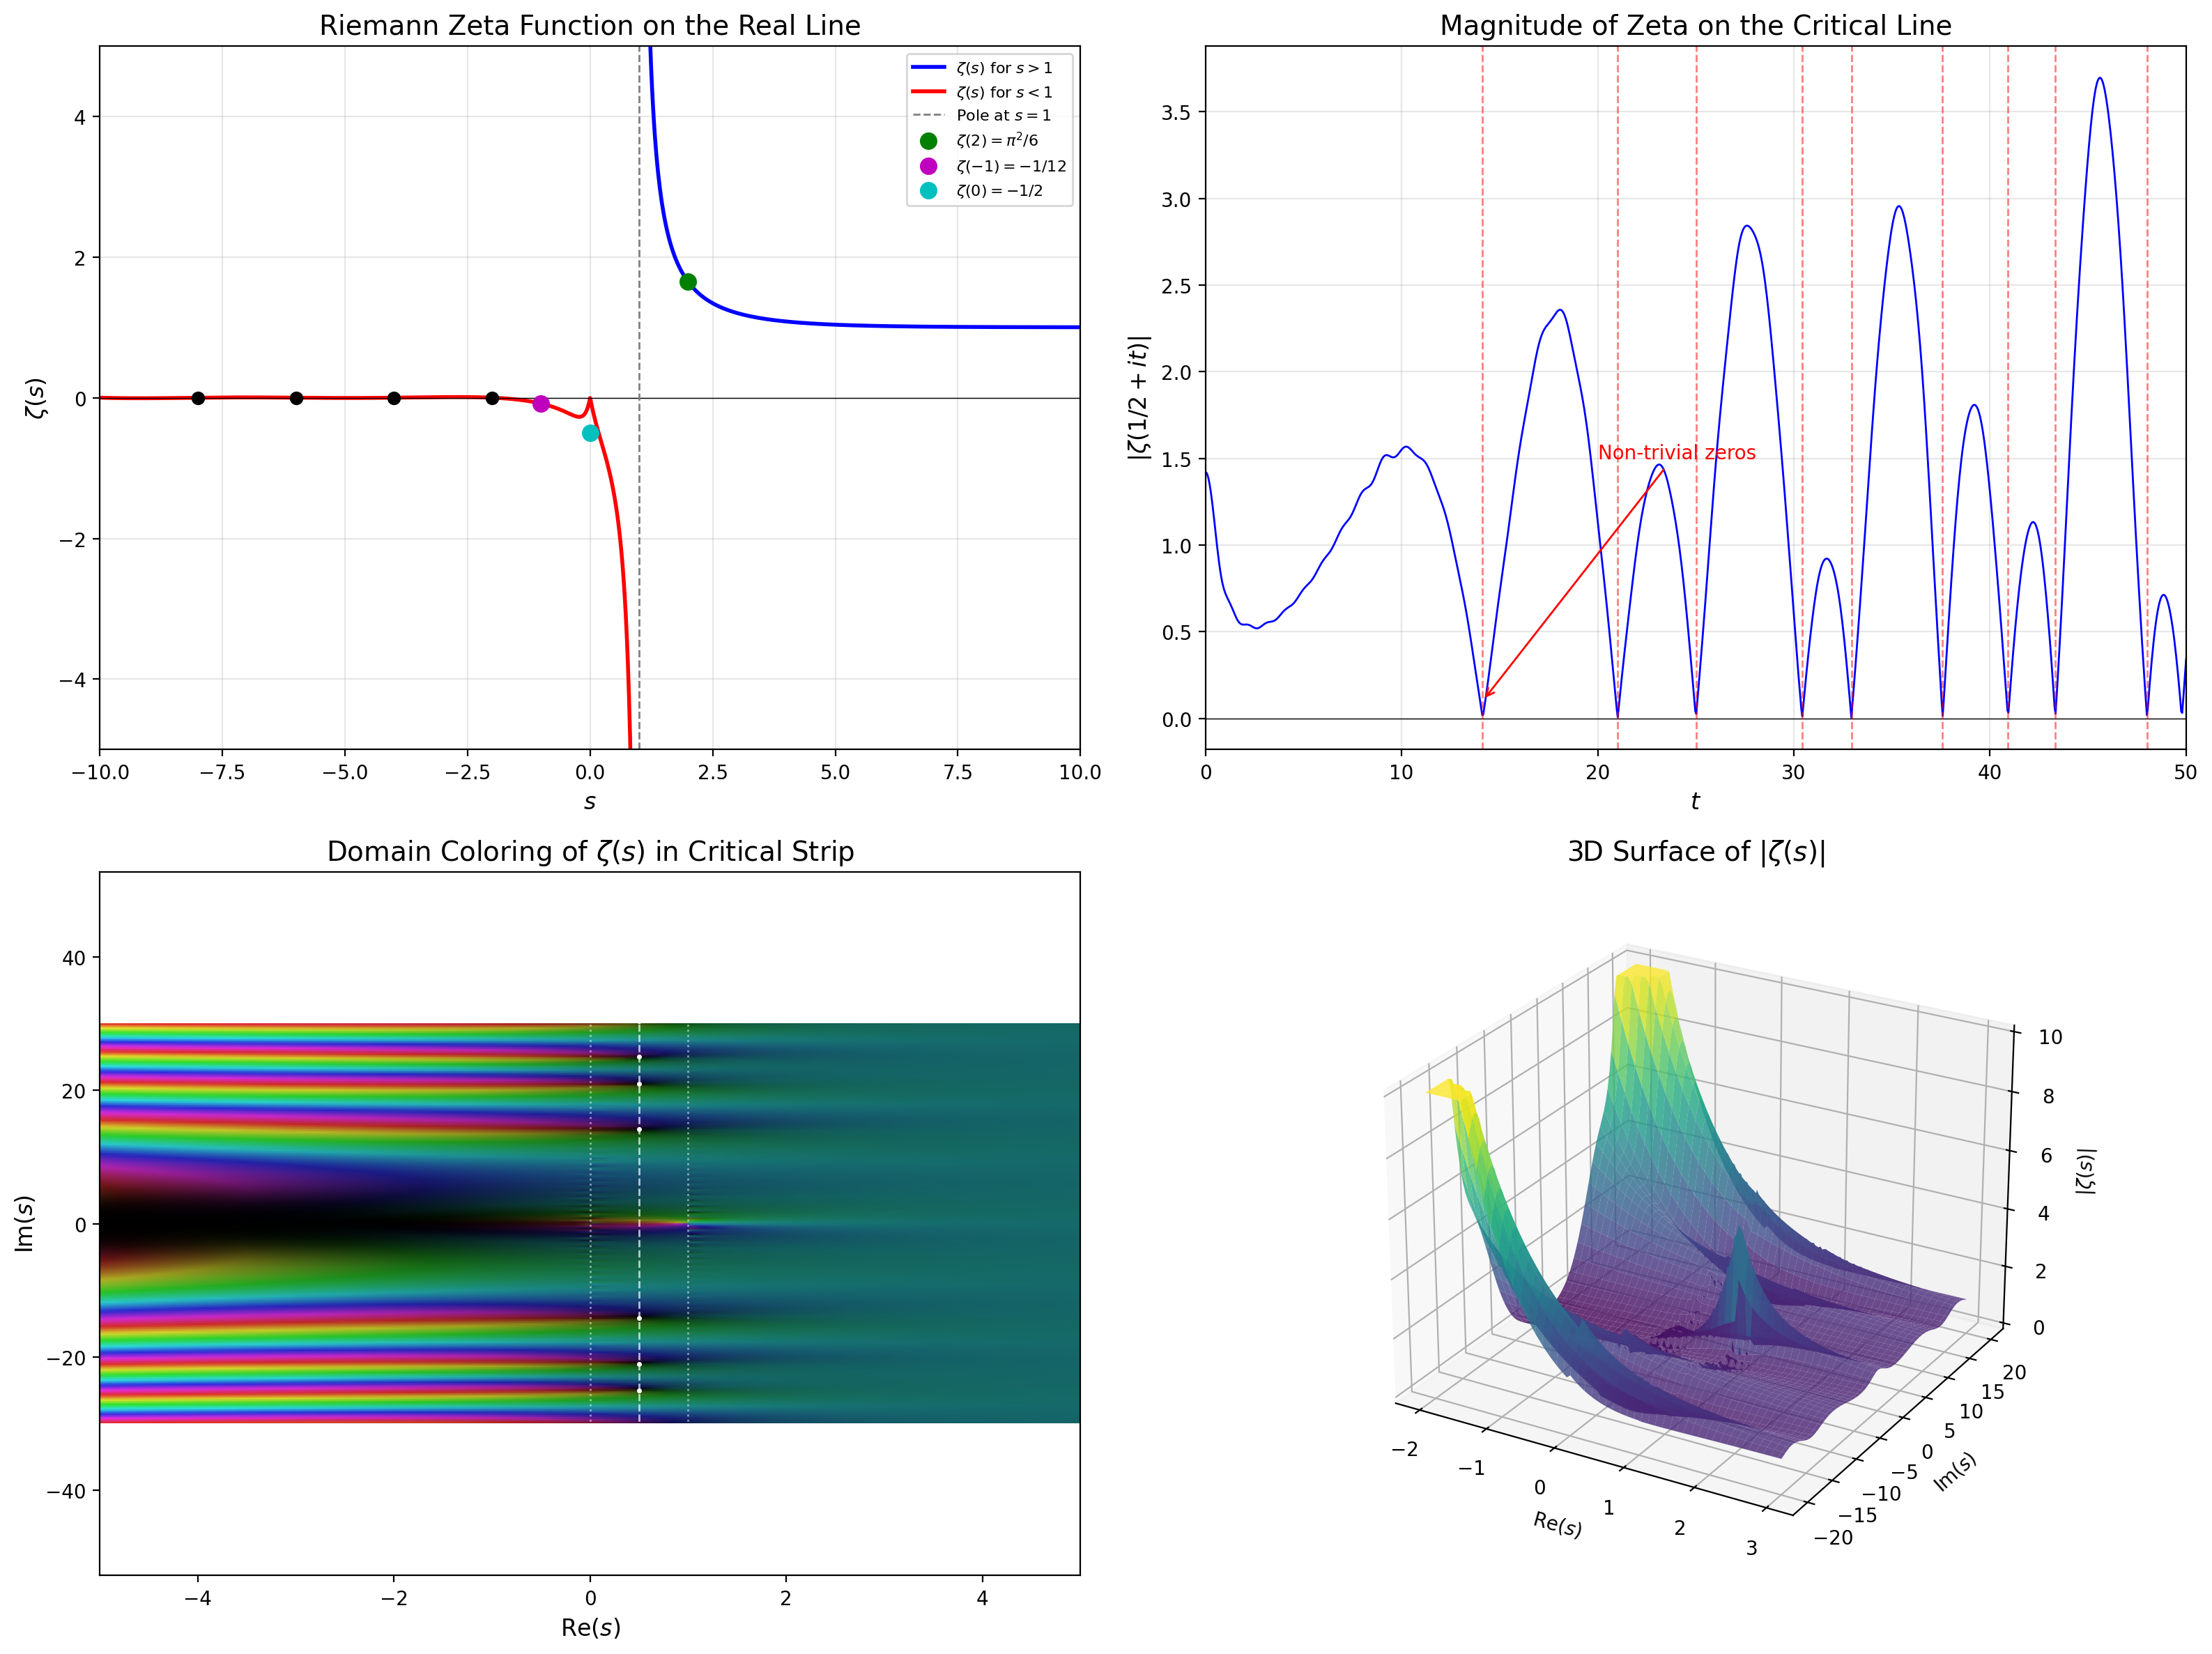

In [4]:
# Create figure with multiple subplots
fig = plt.figure(figsize=(16, 12))

# ============================================
# Plot 1: Zeta function for real arguments
# ============================================
ax1 = fig.add_subplot(2, 2, 1)

# Real zeta for s > 1
s_pos = np.linspace(1.01, 10, 500)
zeta_pos = [real_zeta(s) for s in s_pos]

# Real zeta for s < 1 (using our implementation)
s_neg = np.linspace(-10, 0.99, 500)
zeta_neg = [complex_zeta(s).real for s in s_neg]

ax1.plot(s_pos, zeta_pos, 'b-', linewidth=2, label=r'$\zeta(s)$ for $s > 1$')
ax1.plot(s_neg, zeta_neg, 'r-', linewidth=2, label=r'$\zeta(s)$ for $s < 1$')
ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax1.axvline(x=1, color='gray', linestyle='--', linewidth=1, label='Pole at $s=1$')

# Mark special values
ax1.plot(2, np.pi**2/6, 'go', markersize=8, label=r'$\zeta(2) = \pi^2/6$')
ax1.plot(-1, -1/12, 'mo', markersize=8, label=r'$\zeta(-1) = -1/12$')
ax1.plot(0, -0.5, 'co', markersize=8, label=r'$\zeta(0) = -1/2$')

# Mark trivial zeros
for n in [-2, -4, -6, -8]:
    ax1.plot(n, 0, 'ko', markersize=6)

ax1.set_xlabel('$s$', fontsize=12)
ax1.set_ylabel(r'$\zeta(s)$', fontsize=12)
ax1.set_title('Riemann Zeta Function on the Real Line', fontsize=14)
ax1.set_xlim(-10, 10)
ax1.set_ylim(-5, 5)
ax1.legend(loc='upper right', fontsize=8)
ax1.grid(True, alpha=0.3)

# ============================================
# Plot 2: |zeta(1/2 + it)| - magnitude on critical line
# ============================================
ax2 = fig.add_subplot(2, 2, 2)

t_values = np.linspace(0, 50, 1000)
zeta_critical = [abs(complex_zeta(0.5 + 1j*t)) for t in t_values]

ax2.plot(t_values, zeta_critical, 'b-', linewidth=1)
ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

# Mark known zeros (first few non-trivial zeros)
known_zeros = [14.135, 21.022, 25.011, 30.425, 32.935, 37.586, 40.919, 43.327, 48.005]
for z in known_zeros:
    if z <= 50:
        ax2.axvline(x=z, color='r', linestyle='--', alpha=0.5, linewidth=1)

ax2.set_xlabel('$t$', fontsize=12)
ax2.set_ylabel(r'$|\zeta(1/2 + it)|$', fontsize=12)
ax2.set_title('Magnitude of Zeta on the Critical Line', fontsize=14)
ax2.set_xlim(0, 50)
ax2.grid(True, alpha=0.3)

# Add annotation for zeros
ax2.annotate('Non-trivial zeros', xy=(14.135, 0.1), xytext=(20, 1.5),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red')

# ============================================
# Plot 3: Domain coloring of zeta function
# ============================================
ax3 = fig.add_subplot(2, 2, 3)

print("Computing domain coloring (this may take a moment)...")
rgb, extent = domain_coloring(complex_zeta, (-5, 5), (-30, 30), resolution=200)

ax3.imshow(rgb, extent=extent, origin='lower', aspect='auto')
ax3.axvline(x=0.5, color='white', linestyle='--', linewidth=1, alpha=0.7, label='Critical line')
ax3.axvline(x=0, color='white', linestyle=':', linewidth=1, alpha=0.5)
ax3.axvline(x=1, color='white', linestyle=':', linewidth=1, alpha=0.5)

# Mark some zeros
for z in known_zeros:
    ax3.plot(0.5, z, 'w.', markersize=3)
    ax3.plot(0.5, -z, 'w.', markersize=3)

ax3.set_xlabel('Re$(s)$', fontsize=12)
ax3.set_ylabel('Im$(s)$', fontsize=12)
ax3.set_title('Domain Coloring of $\\zeta(s)$ in Critical Strip', fontsize=14)

# ============================================
# Plot 4: 3D surface of |zeta(s)|
# ============================================
ax4 = fig.add_subplot(2, 2, 4, projection='3d')

# Create meshgrid
sigma = np.linspace(-2, 3, 100)
t = np.linspace(-20, 20, 100)
SIGMA, T = np.meshgrid(sigma, t)

# Compute |zeta(sigma + it)|
Z_mag = np.zeros_like(SIGMA)
for i in range(len(t)):
    for j in range(len(sigma)):
        s = sigma[j] + 1j * t[i]
        try:
            val = abs(complex_zeta(s, num_terms=100))
            # Clip large values for visualization
            Z_mag[i, j] = min(val, 10)
        except:
            Z_mag[i, j] = np.nan

surf = ax4.plot_surface(SIGMA, T, Z_mag, cmap='viridis', alpha=0.8,
                        linewidth=0, antialiased=True)

ax4.set_xlabel('Re$(s)$', fontsize=10)
ax4.set_ylabel('Im$(s)$', fontsize=10)
ax4.set_zlabel(r'$|\zeta(s)|$', fontsize=10)
ax4.set_title('3D Surface of $|\\zeta(s)|$', fontsize=14)
ax4.view_init(elev=25, azim=-60)

plt.tight_layout()
plt.savefig('zeta_function_visualization_analysis.png', dpi=150, bbox_inches='tight')
print("\nPlot saved to 'plot.png'")
plt.show()

## 7. Analysis and Observations

### 7.1 Key Features Visible in the Plots

1. **Real Line Behavior**: 
   - The zeta function has a pole at $s = 1$ (diverges to infinity)
   - Trivial zeros occur at negative even integers: $\zeta(-2n) = 0$
   - The function oscillates for $s < 0$

2. **Critical Line**:
   - The magnitude $|\zeta(1/2 + it)|$ shows clear dips to zero at the non-trivial zeros
   - The first few zeros are at $t \approx 14.135, 21.022, 25.011, ...$

3. **Domain Coloring**:
   - Zeros appear as points where all colors meet
   - The pole at $s = 1$ appears as a bright spot
   - The critical line $\text{Re}(s) = 1/2$ shows the non-trivial zeros

4. **3D Surface**:
   - The valley along the critical line shows where $|\zeta(s)|$ becomes small
   - The spike near $s = 1$ represents the pole

### 7.2 Connection to Prime Numbers

The Prime Number Theorem states that the number of primes less than $x$ is approximately:

$$\pi(x) \sim \frac{x}{\ln x}$$

This result follows from the behavior of $\zeta(s)$ near $s = 1$. The Riemann Hypothesis, if true, would give us the best possible error bounds on this approximation.

## 8. Conclusion

The Riemann zeta function is a cornerstone of analytic number theory. Through our visualizations, we have explored:

- The behavior of $\zeta(s)$ on the real line, including its special values and zeros
- The distribution of non-trivial zeros along the critical line $\text{Re}(s) = 1/2$
- The complex structure of $\zeta(s)$ through domain coloring
- The 3D landscape of $|\zeta(s)|$ in the critical strip

The mysterious distribution of the non-trivial zeros—all seemingly lying on the critical line—remains one of mathematics' greatest unsolved problems. Understanding this pattern would have profound implications for our knowledge of prime numbers and many areas of mathematics and physics.

## References

1. Edwards, H. M. (1974). *Riemann's Zeta Function*. Academic Press.
2. Titchmarsh, E. C. (1986). *The Theory of the Riemann Zeta-Function*. Oxford University Press.
3. Borwein, P., Choi, S., Rooney, B., & Weirathmueller, A. (2008). *The Riemann Hypothesis*. Springer.